## 1. Air quality data preparation
### 1-1. Data extraction
### 해당 블락에서는 CSV나 자체 데이터에 대해서 불러오는 코드로 대체 하면 됩니다.

In [50]:
import sys, os
import pandas as pd
sys.path.append("../../../../")

In [51]:
from Clust.setting import influx_setting_KETI as ins
from Clust.clust.ingestion.influx import influx_client_v2 as influx_Client
db_client = influx_Client.InfluxClient(ins.CLUSTDataServer2)
import missingno as msno

In [52]:
bucket_name ="air_indoor_초등학교"
ms_name ="ICW0W2000022" #ICW0W2000022, ICW0W2000033
clean_level_list =[0, 1, 2, 3, 4]
# ingestion
ingestion_type = "ms_all"
ingestion_param = {
    "bucket_name" : bucket_name,
    'ms_name' : ms_name                       
}
from Clust.clust.data import data_interface
data = data_interface.get_data_result(ingestion_type, db_client, ingestion_param)[:100000]

In [53]:
ingestion_type = "ms_by_time"
ingestion_param['start_time'] = "2021-03-01 00:00:00"
ingestion_param['end_time']  ="2021-12-31 00:00:00"

from Clust.clust.data import data_interface
data = data_interface.get_data_result(ingestion_type, db_client, ingestion_param)
feature_list = data.columns

### 1-2. Original Data EDA

in_co2      0
in_humi     0
in_noise    0
in_pm01     0
in_pm10     0
in_pm25     0
in_temp     0
in_voc      0
dtype: int64


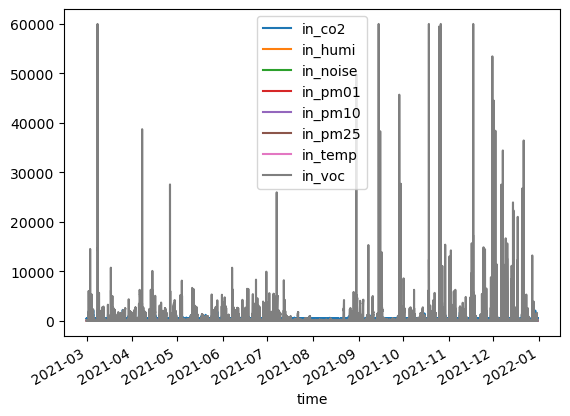

In [54]:
data.plot()
print(data.isna().sum())

### 1-3 Data Preprocessing
### 해당 블락에서는 CSV나 자체 데이터에 대해서 불러오는 코드로 대체 하면 됩니다.

In [55]:
refine_param = {'removeDuplication': 
                    {'flag': True,  'data_min_max_limit':{}}, 
                    'staticFrequency': 
                    {'flag': True, 'frequency': None}
               }

from Clust.clust.preprocessing import processing_interface
refinementData = processing_interface.get_data_result('refine', data , refine_param)
print(refinementData)

                           in_co2  in_humi  in_noise  in_pm01  in_pm10  \
time                                                                     
2021-03-01 00:16:00+00:00   452.0     29.0      46.0     33.0     47.0   
2021-03-01 00:17:00+00:00   454.0     29.0      46.0     33.0     45.0   
2021-03-01 00:18:00+00:00   457.0     29.0      47.0     32.0     44.0   
2021-03-01 00:19:00+00:00   453.0     29.0      47.0     34.0     45.0   
2021-03-01 00:20:00+00:00   458.0     29.0      47.0     34.0     45.0   
...                           ...      ...       ...      ...      ...   
2021-12-30 23:55:00+00:00   471.0     27.0      48.0      7.0      9.0   
2021-12-30 23:56:00+00:00   474.0     27.0      48.0      6.0      9.0   
2021-12-30 23:57:00+00:00   476.0     27.0      48.0      6.0      8.0   
2021-12-30 23:58:00+00:00   478.0     27.0      48.0      6.0      8.0   
2021-12-30 23:59:00+00:00   480.0     27.0      48.0      6.0      7.0   

                           in_pm25  i

in_co2      3090
in_humi     3090
in_noise    3090
in_pm01     3090
in_pm10     3090
in_pm25     3090
in_temp     3090
in_voc      3090
dtype: int64


<Axes: xlabel='time'>

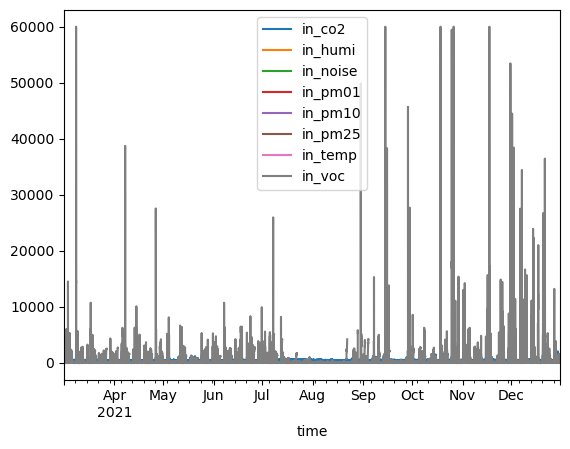

In [56]:
print(refinementData.isna().sum())
refinementData.plot()

In [ ]:
from Clust.clust.ingestion.mongo.mongo_client import MongoClient
from Clust.app import data_manipulation
from Clust.app import  data_preprocessing

mongo_client = MongoClient(ins.CLUSTMetaInfo2)

In [ ]:
ingestion_param={}
ingestion_param['start_time'] = "2021-02-01 00:00:00"
ingestion_param['end_time']  ="2021-03-10 00:00:00"
ingestion_param['ms_list_info'] = ingestion_param['ms_list_info'] = [['farm_swine_air', 'HS2'], ['weather_outdoor_keti_clean', 'sangju'], ['life_additional_Info', 'trigonometicInfoByHours']]  
###########################################
data_mode = 'trainX'
for clean_level in clean_level_list:
    # data name
    collection_name = data_purpose+ "_"+data_name
    ms_name = collection_name + '_cleanLevel' + str(clean_level)+'_' + data_mode
    process_param = data_manipulation.get_process_param_by_level(clean_level)
    # meta info
    meta_info={"bucket_name":bucket_name, "collection_name":collection_name, "ms_name": ms_name, 
               "ingestion_type": ingestion_type, "ingestion_param": ingestion_param, 
               "processing_type":processing_type, "process_param":process_param,
               "integration_param":integration_param, "clean_level":clean_level}
    data_manipulation.save_processed_integrated_data_meta(db_client, mongo_client, meta_info)

###########################################
ingestion_param['start_time']  ="2021-03-10 00:00:00"
ingestion_param['end_time']  ="2021-03-17 00:00:00"  
data_mode = 'testX'

for clean_level in clean_level_list:
    # data name
    collection_name = data_purpose+ "_"+data_name
    ms_name = collection_name + '_cleanLevel' + str(clean_level)+'_' + data_mode
    process_param = data_manipulation.get_process_param_by_level(clean_level)
    # meta info
    meta_info={"bucket_name":bucket_name, "collection_name":collection_name, "ms_name": ms_name,
               "ingestion_type": ingestion_type, "ingestion_param": ingestion_param, 
               "processing_type":processing_type, "process_param":process_param,
               "integration_param":integration_param, "clean_level":clean_level}
    data_manipulation.save_processed_integrated_data_meta(db_client, mongo_client, meta_info)